# **Chapter 3. 판다스 데이터 다루기**

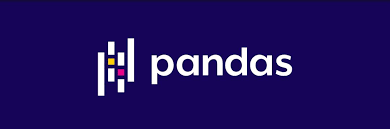

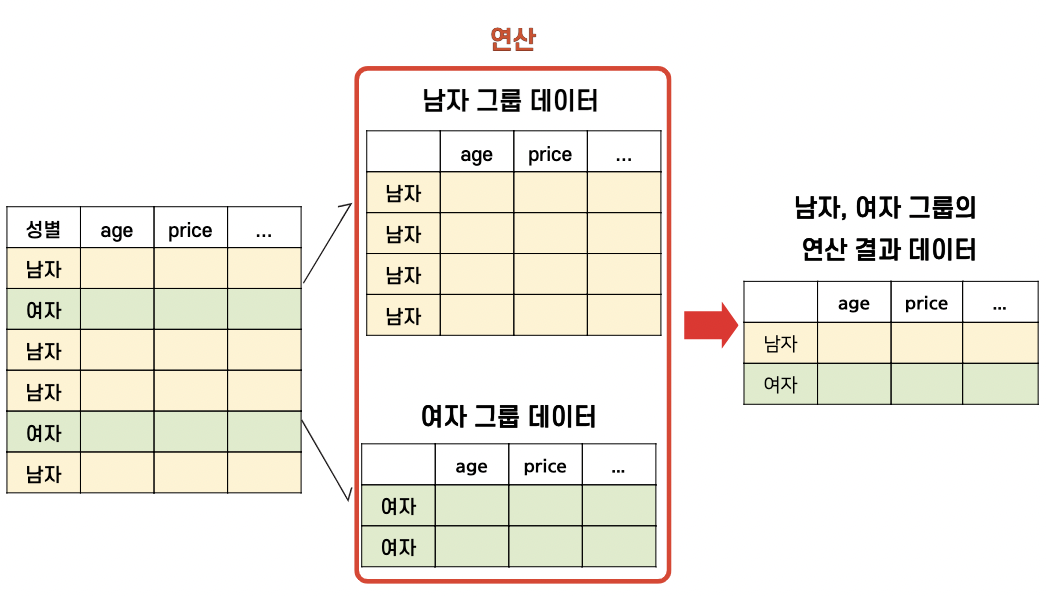

#### 판다스는 위 그림처럼 원본 데이터(왼쪽)에서 사용자의 가공을 통해 정제된 데이터(오른쪽)를 얻기 위한 여러 함수들이 있습니다. 

> 이번 시간에는 이러한 데이터 가공에 많이 쓰이는 함수들을 살펴보겠습니다.

In [ ]:
# 패키지 불러오기
import pandas as pd
import numpy as np

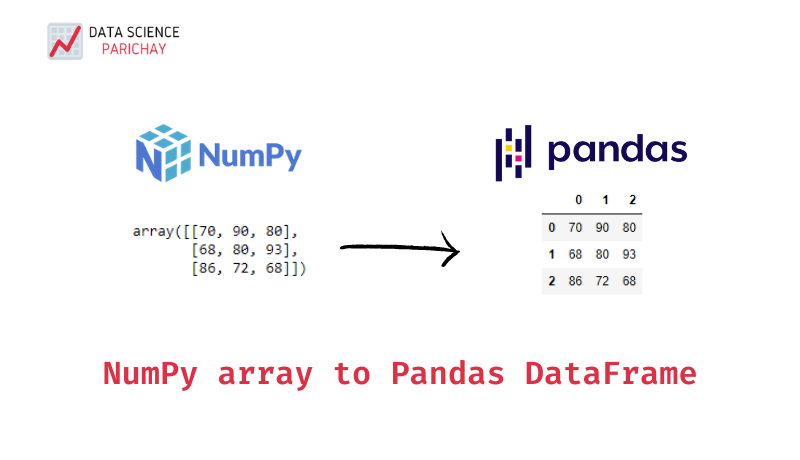

- 판다스의 데이터 저장 형태는 Numpy 배열(array)과 동일합니다.
> 위 그림은 판다스 데이터의 저장 형태는 Numpy array와 동일한 것임을 나타내고 있습니다. 따라서 Numpy배열에서 쓰였던 연산의 특징이 pandas에서도 그대로 활용되는 것이 많습니다.

### **1. 판다스 데이터 간의 사칙연산**
> 판다스에서도 배열간의 사칙연산처럼 데이터간에 사칙연산이 성립합니다. 아래와 같은 Series 데이터로 해보겠습니다.
>
> - s1 = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}, s2 = {'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15}
>
> s1, s2 모두 b, c, d, e 라는 공통된 key(또는 인덱스)를 가지고 있지만, a, f는 각각 s1, s2에만 있는 key입니다. 이 때 판다스는 공통된 인덱스에 있는 값만을 가지고 연산을 수행합니다.
>
> 참고: pd.Series와 pd.DataFrame 모두 선언할 때 index와 columns 인자(argment)를 설정하여 행과 열의 이름을 설정할 수 있습니0다.
>
> - 활용 방법: pd.Series(데이터, index=인덱스 리스트, columns=열 리스트)


In [ ]:
# 예제 1 : Numpy 배열에서 활용된 연산이 그대로 판다스에서도 활용이 가능합니다

s1 = pd.Series([1,2,3,4,5], index=['a', 'b', 'c', 'd', 'e'])  # 인덱스가 a, b, c, d, e 이고, 열이 1, 2, 3, 4, 5인 시리즈가 생성됩니다. 
s2 = pd.Series([11,12,13,14,15], index=['b', 'c', 'd', 'e', 'f'])  # 인덱스가 b, c, d, e, f 이고, 열이 11, 12, 13, 14, 15인 시리즈가 생성됩니다. 

# 더하기
print("\n두 개의 Series를 더하기: \n", s1+s2) # 인덱스 a, f에 대한 결과값은 나오지 않는 것을 확인할 수 있습니다. 

# 빼기
print("\n두 개의 Series를 빼기: \n", s1-s2) 

# 곱하기
print("\n두 개의 Series를 곱하기: \n", s1*s2) 

# 나누기
print("\n두 개의 Series를 나누기: \n", s1/s2) 

- 위에 결과를 잘 살펴보면 연산이 된 값은 b,c,d,e 인덱스 값들만 연산이 된 것을 알 수 있습니다. a, f는 더할 수 있는 대상이 없으므로 NaN이라는 결과가 출력되었습니다.

> 그렇다면 판다스 DataFrame 데이터는 어떻게 될까요?
>
> - 참고: 판다스 데이터는 쥬피터 셀에서 직접 출력하는 것이 print보다 가독성이 뛰어나므로 하나의 셀마다 데이터프레임을 출력합니다.   
(직접 출력하는 것은 하나의 셀에 한 데이터 프레임밖에 안되기 때문입니다.)

In [ ]:
# 예제 2 : 핀다스 DataFrame의 연산

df1 = pd.DataFrame([[1,2,3],[4,5,6],[7,8,9]], columns=list('abc')) # 열 이름을 a, b, c로 하는 데이터 프레임이 만들어집니다. 
df1

In [ ]:
np.arange(16).reshape(4, 4)  # 0~15까지의 수로 만들어진 1차원 배열을 4*4 형태의 2차원 배열로 reshape해줍니다.

In [ ]:
arr = np.array([[ 0,  1,  2,  3],
               [ 4,  5,  6,  7],
               [ 8,  9, 10, 11],
               [12, 13, 14, 15]]) # (4, 4) 배열 정의

df2 = pd.DataFrame(arr, columns=list('abcd'))
df2

- 아래의 결과를 보면 행과 열의 index가 일치하는 경우에만 연산이 된다는 것을 알 수 있습니다. 판다스는 값이 없는 경우는 NaN으로 표기.

In [ ]:
df1+df2  

In [ ]:
df1

- 더할 때 NaN이 뜨지 않게 하는 방법은 없을까요?
> 판다스는 .add 라는 데이터 프레임 변수의 속성을 통해서 더하기 연산을 할 수 있습니다. 이 때 fill_value라는 인자를 통해 값이 없는 경우 대체할 값을 지정할 수 있습니다.
> - 활용 방법 : df1.add(df2, fill_value="원하는 값 지정")

In [ ]:
# 값이 없으면 0으로 대체해서 연산하기

df = df1.add(df2, fill_value=0)
df

## <연습문제 Set>
<a href='#jce-judge/open/8_y3FgYQK-0' target='_self'><h3>판다스 기초 9 - 데이터프레임의 사칙연산</h3></a>

In [ ]:
# 예제 3 : DataFrame을 각각 원하는 값으로 설정하고 곱하기 연산을 수행하기

# DataFrame의 더하기 결과
arr_1 = np.full((3, 9), 3) # (3, 9) 형태의 3으로 채워진 배열 생성
arr_2 = np.full((2, 4), 5) # (2, 4) 형태의 5으로 채워진 배열 생성

df1 = pd.DataFrame(arr_1, columns=list('abcdefghi'))
df2 = pd.DataFrame(arr_2, columns=list('cdef'))

df1*df2

- 위의 결과에서도 c, d, e 열과 0, 1 행만 공통된 데이터이므로 이 부분만 연산이 된 것을 확인할 수 있습니다.

### **2. 판다스 데이터에서도 성립하는 브로드캐스팅(Broadcasting)**
> 앞서 판다스의 데이터 저장형태는 Numpy의 array와 동일하다고 하였습니다.
>
> 이에 따라 Numpy 배열 연산에서 활용되었던 브로드캐스팅 연산이 판다스 데이터에서도 그대로 활용될 수 있습니다.
>
> 브로드 캐스팅으로 판다스 데이터 연산을 처리해보겠습니다.

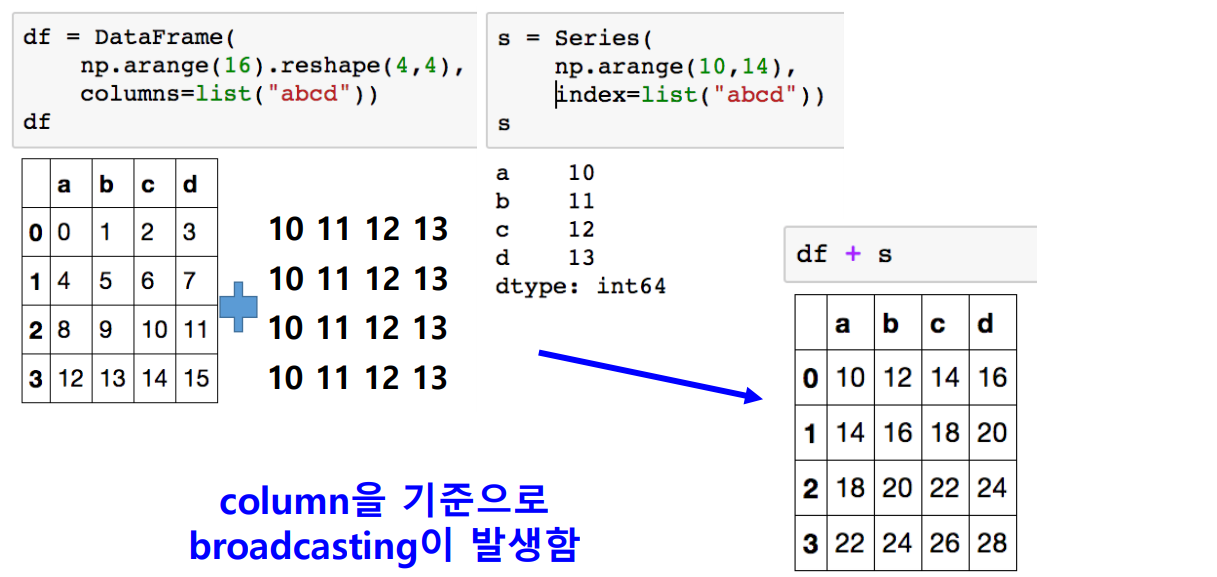

In [ ]:
# 예제 4 : 위 예재와 동일한 배열을 생성하고 이를 판다스 데이터프레임으로 전환하기

arr = np.arange(16).reshape(4,4)
print("위 예제와 동일한 배열 생성:\n", arr)

column_list = ['a', 'b', 'c', 'd']
df = pd.DataFrame(arr, columns=column_list)

df

In [ ]:
# 위 그림에서 표현된 Series데이터 생성하기

arr = np.arange(10,14)
print("위 예제와 동일한 배열 생성:\n", arr)

s = pd.Series(arr, index=['a', 'b', 'c', 'd'])
s

In [ ]:
# 위에서 생성한 데이터 더하기
df + s 

#### **열 index 기준으로 broad casting이 된 것을 확인할 수 있습니다.** 

>예를 들어, series 데이터의 인덱스 a의 값은 10입니다. 이 값이 dataframe 데이터의 a열인 [0, 4, 8, 12]에 모두 적용되어 출력이 [10, 14, 18, 22]가 되었음을 볼 수 있습니다. 즉, 동일한 인덱스(예시에서는 a)를 기준으로 브로드캐스팅되어 숫자 10이 모든 열의 값에 적용되었습니다.  
동일한 방식으로 s, 즉 [10, 11, 12, 13]를 모든 열에 적용하여 더해줍니다. (np의 브로드캐스팅과 동일하죠?)

> 이번에는 데이터프레임의 행 인덱스인 0, 1, 2, 3을 기준으로 브로드캐스팅을 해보겠습니다.

In [ ]:
# 행 index 기준으로 broad casting 해보기

s2 = pd.Series(np.arange(10,14))

df.add(s2, axis=0)  # 0번 축을 기준으로 더해줍니다.

#### **위처럼 두 개의 서로 다른 데이터 간에 공통된 인덱스가 없는 경우는 브로드캐스팅이 어떻게 수행될까요?**

> 이번에는 공통된 인덱스가 없는 두 개의 데이터가 연산될 때 브로드 캐스팅이 어떻게 되는지 알아보겠습니다.
>
> 위의 예제에서 Series 데이터의 인덱스 중에서 d를 z로 바꾸어 연산을 해보겠습니다.

In [ ]:
# 예제 5 : 위 예재와 동일한 배열을 생성하고 이를 판다스 데이터프레임으로 전환하기

arr = np.arange(10,14)
print("위 예제와 동일한 배열 생성:\n", arr)

# 인덱스를 'a', 'b', 'c', 'd'에서 'd'를 'z'로 변경
s = pd.Series(arr, index=['a', 'b', 'c', 'z'])
print(s)
df + s

#### **두 개의 데이터에서 공통된 것이 없는 곳은 NaN으로 채워서 브로드캐스팅 연산을 하는 것을 알 수 있습니다.**
> 아래의 예제를 통해 서로 다른 인덱스를 가지는 DataFrame 변수 1개와 Serise 변수 1개를 정의하여 더하기 연산을 수행해보겠습니다.

In [ ]:
# 예제 6 : 임의의 배열을 생성하고 브로드 캐스팅 연산해보기

# Broadcasting 연산해보기

arr_1 = np.full((4,4), 4)
df = pd.DataFrame(arr_1, columns=list("abcd"))

arr_2 = np.array([10, 11, 12, 13])
ser = pd.Series(arr_2, index=list("cdef"))

# 공통된 것이 없는 열 이름: a, b, e, f

df+ser

### **3. 데이터의 평균, 분포 등을 구해주는 함수**
> 판다스는 데이터 분석을 위한 패키지인만큼 Numpy처럼 평균, 분산 등을 구하는 함수가 내장되어 있습니다.
>
> 간단하게 이를 활용하여 데이터의 정보를 구해보겠습니다.
>
> 활용 방법 - df.describe()

In [ ]:
# 데이터 불러오기
df = pd.read_csv("./price_list.csv")
df

In [ ]:
df.describe() 

- describe는 위처럼 각 통계치를 한눈에 보여줍니다.
> count는 개수, mean은 평균, std는 표준편차, min, max은 최소,최대값. 25%, 50%, 75%는 각 백분율에 위치하는 값을 보여줍니다.

## <연습문제 Set>
<a href='#jce-judge/open/2fZ8Yi2TGwg' target='_self'><h3>판다스 기초 10 - 데이터프레임 정규화</h3></a>